In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
weight = 0.3
bias = 0.9

X = torch.arange(0, 100, step=1).unsqueeze(dim=1)
y = weight*X + bias

training_split = int(0.8 * len(X))
X_train, y_train = X[:training_split], y[:training_split]
X_test, y_test = X[training_split:], y[training_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

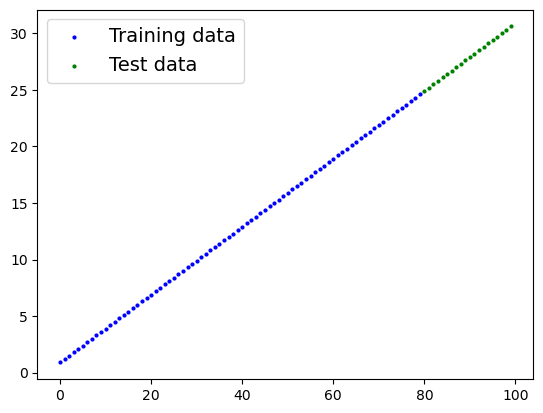

In [9]:
def plot_predictions(train_data=X_train,
                     test_data=X_test,
                     train_labels=y_train,
                     test_labels=y_test,
                     predictions=None):
    plt.scatter(train_data, train_labels, s=4, c="b", label="Training data")
    plt.scatter(test_data, test_labels, s=4, c="g", label="Test data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, s=4, c="r", label="Predictions")
    
    plt.legend(prop={"size":14})
        
plot_predictions()

In [23]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight*x + self.bias

In [42]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [58]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.0001)

In [59]:
epochs = 300

for epoch in range(epochs):
    model_0.train()
    
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        model_0.eval()
        with torch.inference_mode():
            y_preds = model_0(X_test)
            test_loss = loss_fn(y_preds, y_test)
            
        print(f"Training loss: {loss} | Test loss: {test_loss}")

Training loss: 7.732377529144287 | Test loss: 16.795686721801758
Training loss: 4.609877109527588 | Test loss: 9.723188400268555
Training loss: 1.48737633228302 | Test loss: 2.6506855487823486
Training loss: 0.12020939588546753 | Test loss: 0.17188043892383575
Training loss: 0.11986954510211945 | Test loss: 0.16936340928077698
Training loss: 0.11952990293502808 | Test loss: 0.16684599220752716
Training loss: 0.11917480081319809 | Test loss: 0.16432876884937286
Training loss: 0.11880026012659073 | Test loss: 0.1615825593471527
Training loss: 0.11845411360263824 | Test loss: 0.17159557342529297
Training loss: 0.11811419576406479 | Test loss: 0.169078066945076
Training loss: 0.11783522367477417 | Test loss: 0.16746234893798828
Training loss: 0.11742717027664185 | Test loss: 0.1656196564435959
Training loss: 0.11709140241146088 | Test loss: 0.17585936188697815
Training loss: 0.1167435497045517 | Test loss: 0.16193275153636932
Training loss: 0.11637961864471436 | Test loss: 0.16009005904197

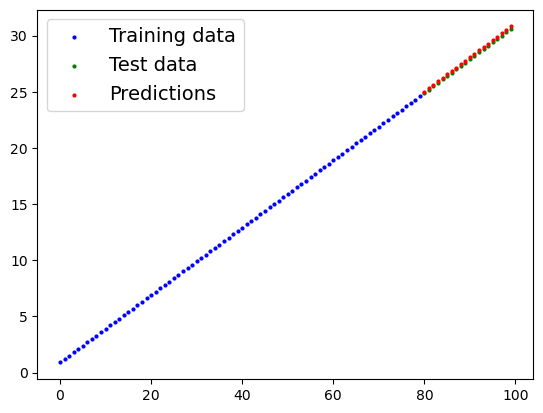

In [60]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)